In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def draw( x1, x2 ):
    ln = plt.plot( x1, x2 )

In [29]:
def sigmoid( score ):
    return 1 / (1 + np.exp( -score ) )

In [30]:
def compute_error( line_parameters, points, y ):
    p = sigmoid( points * line_parameters )
    return -( np.log( p ).T * y + np.log( 1 - p ).T * ( 1 - y ) ) / points.shape[ 0 ]

In [42]:
def gradient_descent( line_parameters, points, y, alpha ):
    m = points.shape[ 0 ]
    for i in range( 500 ):
        p = sigmoid( points * line_parameters )
        gradient = ( points.T * ( p - y ) ) * ( alpha / m )
        line_parameters = line_parameters - gradient
        w1 = line_parameters.item( 0 )
        w2 = line_parameters.item( 1 )
        bias = line_parameters.item( 2 )
        x1 = np.array( [ lower_region[ :, 0 ].min(), upper_region[ :, 0 ].max() ] )
        if w2 != 0:
            x2 = -bias / w2 + x1 * ( -w1 / w2 )
        else:
            x2 = 0
    draw ( x1, x2 )

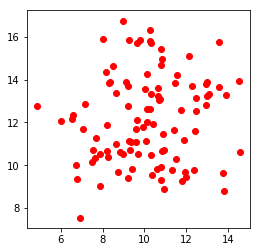

In [32]:
# prepare upper sample points (representing people having diabetis)
n_pts = 100
np.random.seed( 0 )
bias = np.ones( n_pts )
random_x1_values = np.random.normal( 10, 2, n_pts )
random_x2_values = np.random.normal( 12, 2, n_pts )
upper_region = np.array( [ random_x1_values, random_x2_values, bias ] ).T
_, ax = plt.subplots( figsize = ( 4, 4 ) )
ax.scatter( upper_region [ :, 0 ], upper_region [ :, 1 ], color='r' )
plt.show()

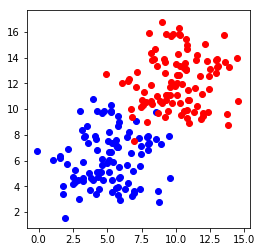

In [33]:
# prepare lower sample points (representing people not having diabetis)
np.random.seed(0)
random_x1_values = np.random.normal(5, 2, n_pts)
random_x2_values = np.random.normal(6, 2, n_pts)
lower_region = np.array( [ random_x1_values, random_x2_values, bias ] ).T
all_points = np.vstack( ( upper_region, lower_region ) )
_, ax = plt.subplots( figsize = ( 4, 4 ) )
ax.scatter( lower_region [ :, 0 ], lower_region [ :, 1 ], color='b' )
ax.scatter( upper_region [ :, 0 ], upper_region [ :, 1 ], color='r' )
plt.show()

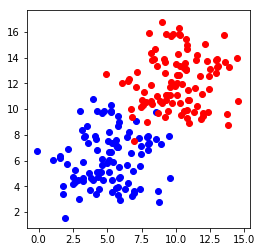

In [40]:
#w1 = -0.2
#w2 = -0.35
#bias = 3.5
#line_parameters = np.matrix( [ w1, w2, bias ] ).T
line_parameters = np.matrix( [ np.zeros( 3 ) ] ).T
#x1 = np.array( [ lower_region[ :, 0 ].min(), upper_region[ :, 0 ].max() ] )
#x2 = -bias / w2 + x1 * ( -w1 / w2 )
linear_combination = all_points * line_parameters
_, ax = plt.subplots( figsize = ( 4, 4 ) )
ax.scatter( lower_region [ :, 0 ], lower_region [ :, 1 ], color='b' )
ax.scatter( upper_region [ :, 0 ], upper_region [ :, 1 ], color='r' )
#draw ( x1, x2 )
plt.show()

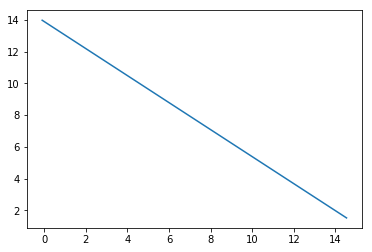

In [43]:
#probabilities = sigmoid( linear_combination )
y = np.array( [ np.zeros( n_pts ), np.ones( n_pts ) ] ).reshape( n_pts * 2, 1 )
#total_error = compute_error( line_parameters, all_points, y )
#print ( all_points.shape )
#print ( line_parameters.shape )
#print ( "All Points" )
#print ( all_points )
#print ( "Linear Combination" )
#print ( linear_combination )
#print ( "Probabilites" )
#print ( probabilities )
#print ( total_error )
gradient_descent( line_parameters, all_points, y, 0.06 )
plt.show()